In [2]:
# Import necessary libraries
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset into a directed graph
file_path = "Email-EuAll.txt"
G = nx.read_edgelist(file_path, create_using=nx.DiGraph(), nodetype=int)

print(f"Graph loaded successfully with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")


Graph loaded successfully with 265214 nodes and 420045 edges.


In [3]:
G_undirected = G.to_undirected()

# Find all connected components and extract the largest one
connected_components = list(nx.connected_components(G_undirected))
largest_component = max(connected_components, key=len)

# Create a subgraph containing only the largest connected component
largest_component_subgraph = G.subgraph(largest_component)

print(f"Largest connected component has {largest_component_subgraph.number_of_nodes()} nodes and {largest_component_subgraph.number_of_edges()} edges.")

# ------------------------------
# Visualize the Largest Connected Component
# ------------------------------
# Use a layout algorithm to position the nodes
plt.figure(figsize=(12, 8))

# Use spring layout for positioning nodes (you can experiment with other layouts like Kamada-Kawai)
pos = nx.spring_layout(largest_component_subgraph, seed=42, k=0.1)  # k controls the distance between nodes

# Draw the network
nx.draw_networkx(
    largest_component_subgraph,
    pos=pos,
    node_size=10,  # Smaller node size for clarity
    node_color="skyblue",
    edge_color="gray",
    with_labels=False,  # Labels are omitted for clarity
    alpha=0.7  # Slightly transparent nodes
)

# Add title and remove axes
plt.title("Visualization of the Largest Connected Component", fontsize=14)
plt.axis("off")

# Show the plot
plt.show()

Largest connected component has 224832 nodes and 395270 edges.


KeyboardInterrupt: 

<Figure size 1200x800 with 0 Axes>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Generate a random graph with 10,000 nodes
G = nx.gnm_random_graph(10000, 30000)

# Sample 10,000 nodes randomly
sampled_nodes = random.sample(G.nodes(), 10000)
sampled_graph = G.subgraph(sampled_nodes)

# Draw the network graph
plt.figure(figsize=(12, 12))
nx.draw(sampled_graph, node_size=10, with_labels=False)
plt.title("Network Graph of 10,000 Randomly Sampled Nodes")
plt.show()

# Generate degree distribution for the bar graph
degrees = [G.degree(n) for n in sampled_nodes]
degree_count = {d: degrees.count(d) for d in set(degrees)}

# Draw the bar graph
plt.figure(figsize=(10, 6))
plt.bar(degree_count.keys(), degree_count.values())
plt.title("Degree Distribution of Sampled Nodes")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

# ------------------------------
# 1. Complete Description of the Dataset
# ------------------------------
print("\n--- Complete Description of the Dataset ---")
print("The dataset represents an email communication network within a large European research institution.")
print("Nodes: Individuals (e.g., employees, researchers, or staff).")
print("Edges: Directed edges represent at least one email sent between October 2003 and March 2005.")
print(f"Number of Nodes: {G.number_of_nodes()}")
print(f"Number of Edges: {G.number_of_edges()}")


TypeError: Population must be a sequence.  For dicts or sets, use sorted(d).

In [ ]:
# ------------------------------
# 2. Katz Centrality
# ------------------------------
print("\nCalculating Katz Centrality for all nodes...")
katz_centrality = nx.katz_centrality(G, alpha=0.01, max_iter=1000)  # alpha < 1/lambda_max

# Convert Katz Centrality results to a DataFrame for better visualization
katz_df = pd.DataFrame(list(katz_centrality.items()), columns=["Node", "Katz Centrality"])
katz_df = katz_df.sort_values(by="Katz Centrality", ascending=False).reset_index(drop=True)
print("Top 10 Nodes by Katz Centrality:")
print(katz_df.head(10))

# Plot Katz Centrality Distribution
plt.figure(figsize=(12, 6))
plt.hist(katz_df["Katz Centrality"], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Katz Centrality")
plt.xlabel("Katz Centrality")
plt.ylabel("Frequency")
plt.show()

# Draw the network graph with adjusted layout
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(sampled_graph, k=0.1)  # Adjust k for better spacing
nx.draw(sampled_graph, pos, node_size=10, with_labels=False)
plt.title("Network Graph of 10,000 Randomly Sampled Nodes")
plt.show()

# Draw the bar graph with logarithmic scale
plt.figure(figsize=(10, 6))
plt.bar(degree_count.keys(), degree_count.values())
plt.yscale('log')
plt.title("Degree Distribution of Sampled Nodes (Log Scale)")
plt.xlabel("Degree")
plt.ylabel("Frequency (Log Scale)")
plt.show()



Calculating Katz Centrality for all nodes...


NameError: name 'nx' is not defined


Calculating PageRank Centrality for all nodes...
Top 10 Nodes by PageRank Centrality:
     Node  PageRank Centrality
0     422             0.007521
1  179170             0.007240
2      30             0.006813
3      72             0.004542
4     298             0.004507
5     485             0.004188
6     310             0.004114
7      10             0.003340
8     366             0.003305
9      83             0.003003


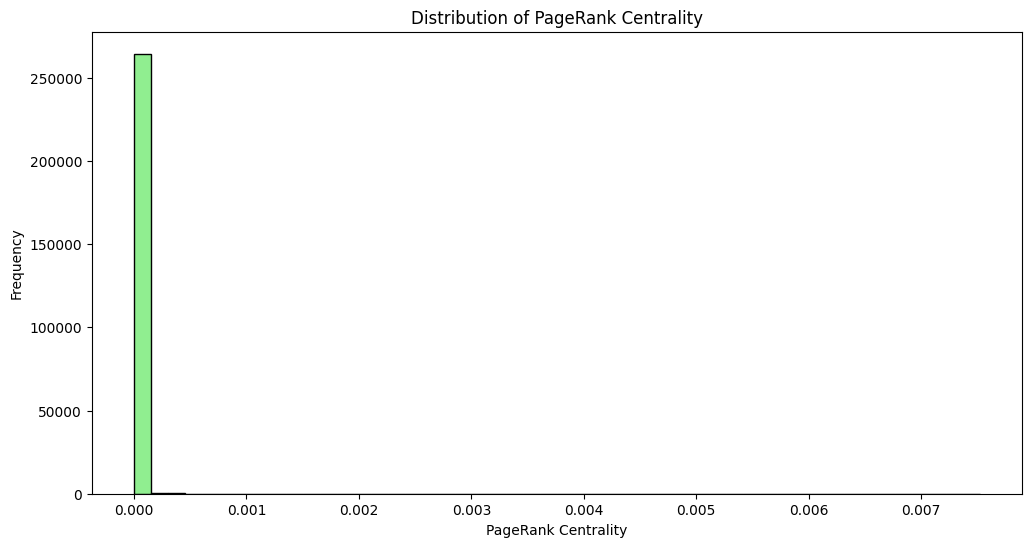

In [ ]:

# ------------------------------
# 3. PageRank Centrality
# ------------------------------
print("\nCalculating PageRank Centrality for all nodes...")
pagerank_centrality = nx.pagerank(G, alpha=0.85)

# Convert PageRank Centrality results to a DataFrame
pagerank_df = pd.DataFrame(list(pagerank_centrality.items()), columns=["Node", "PageRank Centrality"])
pagerank_df = pagerank_df.sort_values(by="PageRank Centrality", ascending=False).reset_index(drop=True)
print("Top 10 Nodes by PageRank Centrality:")
print(pagerank_df.head(10))

# Plot PageRank Centrality Distribution
plt.figure(figsize=(12, 6))
plt.hist(pagerank_df["PageRank Centrality"], bins=50, color='lightgreen', edgecolor='black')
plt.title("Distribution of PageRank Centrality")
plt.xlabel("PageRank Centrality")
plt.ylabel("Frequency")
plt.show()



Calculating Local Clustering Coefficients for all nodes...
Top 10 Nodes by Local Clustering Coefficient:
     Node  Local Clustering Coefficient
0    3898                           1.0
1    3891                           1.0
2  257158                           1.0
3  220899                           1.0
4  138102                           1.0
5  171300                           1.0
6    3827                           1.0
7  167569                           1.0
8  257152                           1.0
9  125366                           1.0


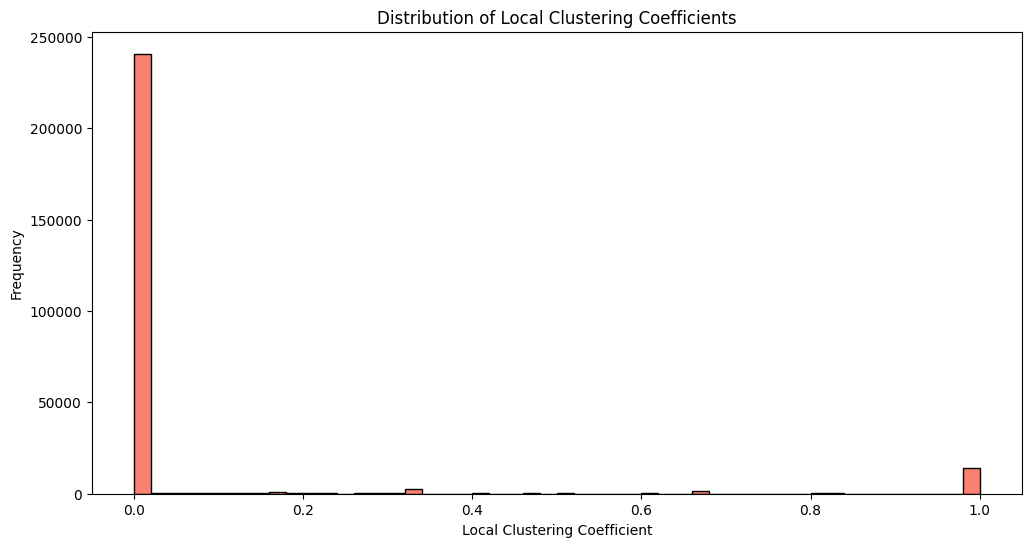

In [ ]:

# ------------------------------
# 4. Local Clustering Coefficient
# ------------------------------
print("\nCalculating Local Clustering Coefficients for all nodes...")
local_clustering = nx.clustering(G.to_undirected())  # Convert to undirected for clustering

# Convert Local Clustering Coefficient results to a DataFrame
local_clustering_df = pd.DataFrame(list(local_clustering.items()), columns=["Node", "Local Clustering Coefficient"])
local_clustering_df = local_clustering_df.sort_values(by="Local Clustering Coefficient", ascending=False).reset_index(drop=True)
print("Top 10 Nodes by Local Clustering Coefficient:")
print(local_clustering_df.head(10))

# Plot Local Clustering Coefficient Distribution
plt.figure(figsize=(12, 6))
plt.hist(local_clustering_df["Local Clustering Coefficient"], bins=50, color='salmon', edgecolor='black')
plt.title("Distribution of Local Clustering Coefficients")
plt.xlabel("Local Clustering Coefficient")
plt.ylabel("Frequency")
plt.show()


In [ ]:

# ------------------------------
# 5. Global Clustering Coefficient
# ------------------------------
global_clustering = nx.average_clustering(G.to_undirected())
print(f"\nGlobal Clustering Coefficient: {global_clustering:.4f}")



Global Clustering Coefficient: 0.0671


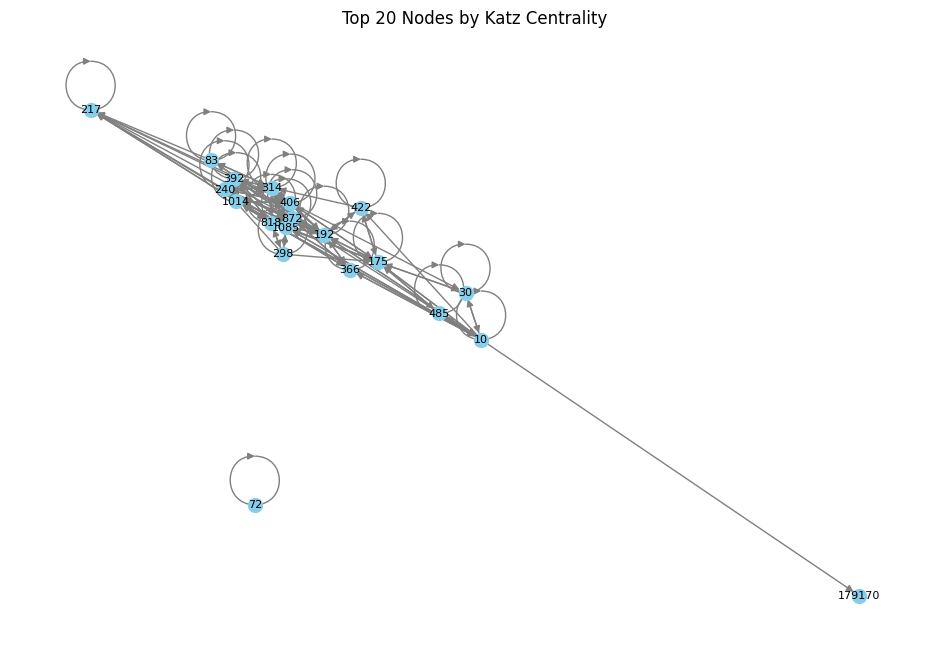

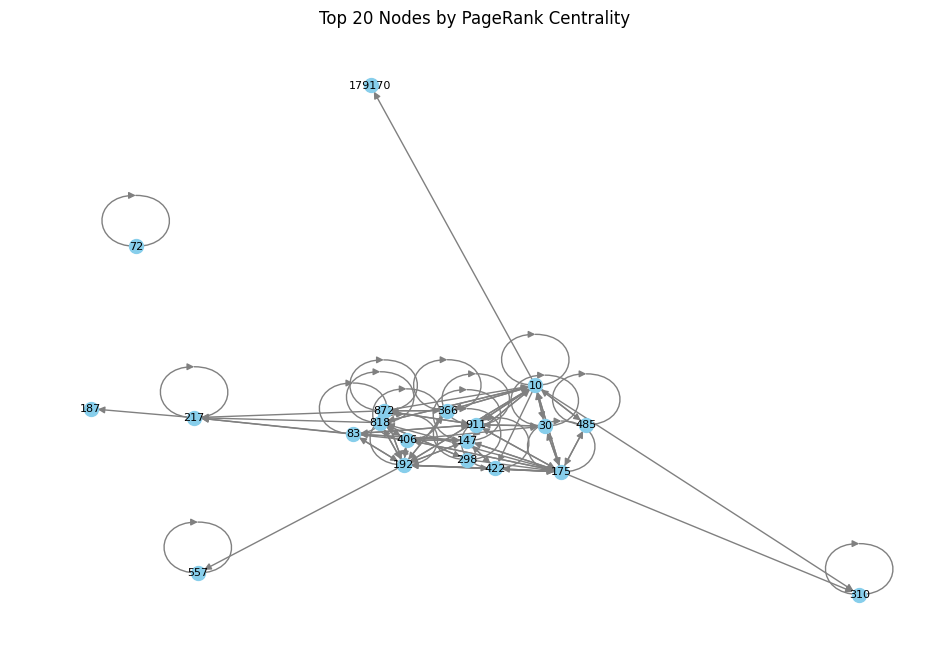

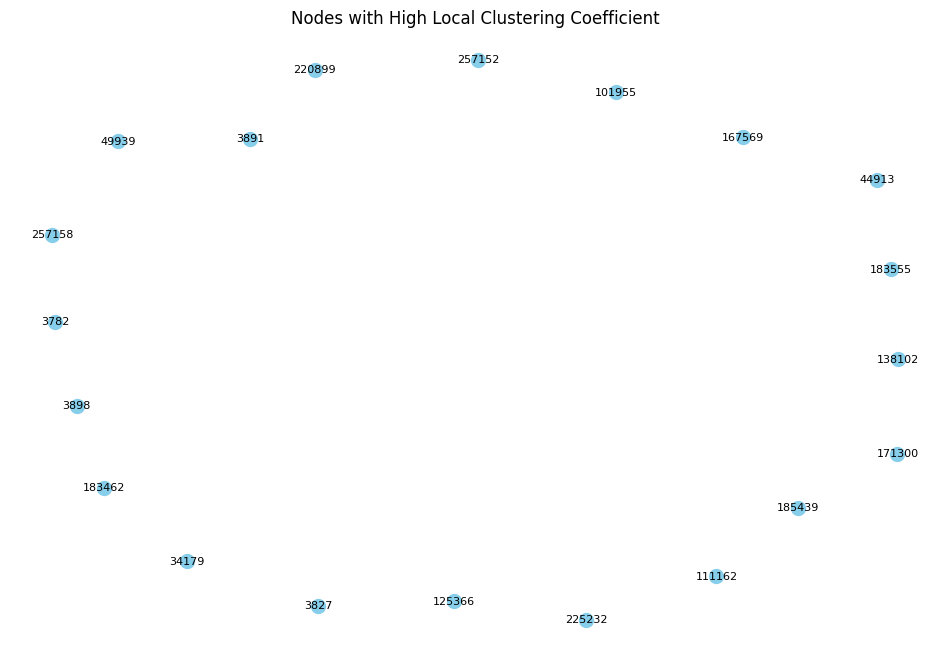

In [ ]:
# ------------------------------
# 6. Network Visualization
# ------------------------------

# Function to visualize a subgraph
def visualize_subgraph(graph, nodes, title):
    """
    Visualize a subgraph containing the specified nodes.
    """
    # Extract the subgraph induced by the given nodes
    subgraph = graph.subgraph(nodes)
    
    # Use spring layout for positioning nodes
    pos = nx.spring_layout(subgraph, seed=42)
    
    # Draw the network
    plt.figure(figsize=(12, 8))
    nx.draw_networkx(
        subgraph,
        pos=pos,
        node_size=100,
        node_color="skyblue",
        edge_color="gray",
        font_size=8,
        with_labels=True
    )
    plt.title(title)
    plt.axis("off")
    plt.show()

# Visualize top nodes by Katz Centrality
top_katz_nodes = katz_df["Node"].head(20).tolist()
visualize_subgraph(G, top_katz_nodes, "Top 20 Nodes by Katz Centrality")

# Visualize top nodes by PageRank Centrality
top_pagerank_nodes = pagerank_df["Node"].head(20).tolist()
visualize_subgraph(G, top_pagerank_nodes, "Top 20 Nodes by PageRank Centrality")

# Visualize nodes with high local clustering coefficients
high_clustering_nodes = local_clustering_df[local_clustering_df["Local Clustering Coefficient"] == 1]["Node"].head(20).tolist()
visualize_subgraph(G, high_clustering_nodes, "Nodes with High Local Clustering Coefficient")


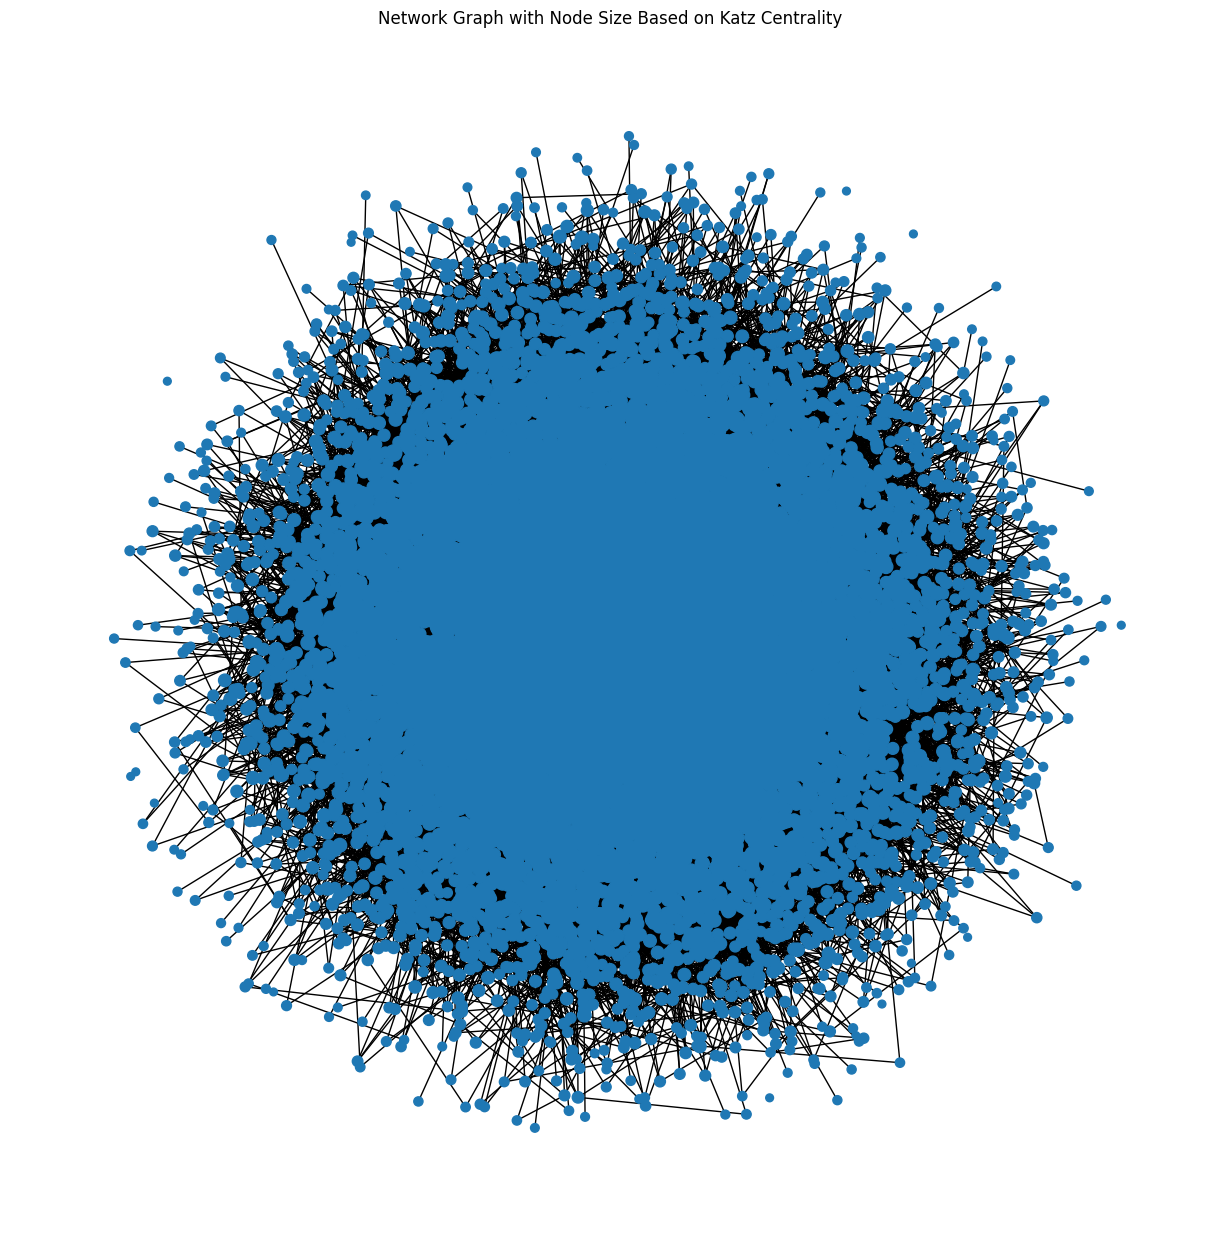

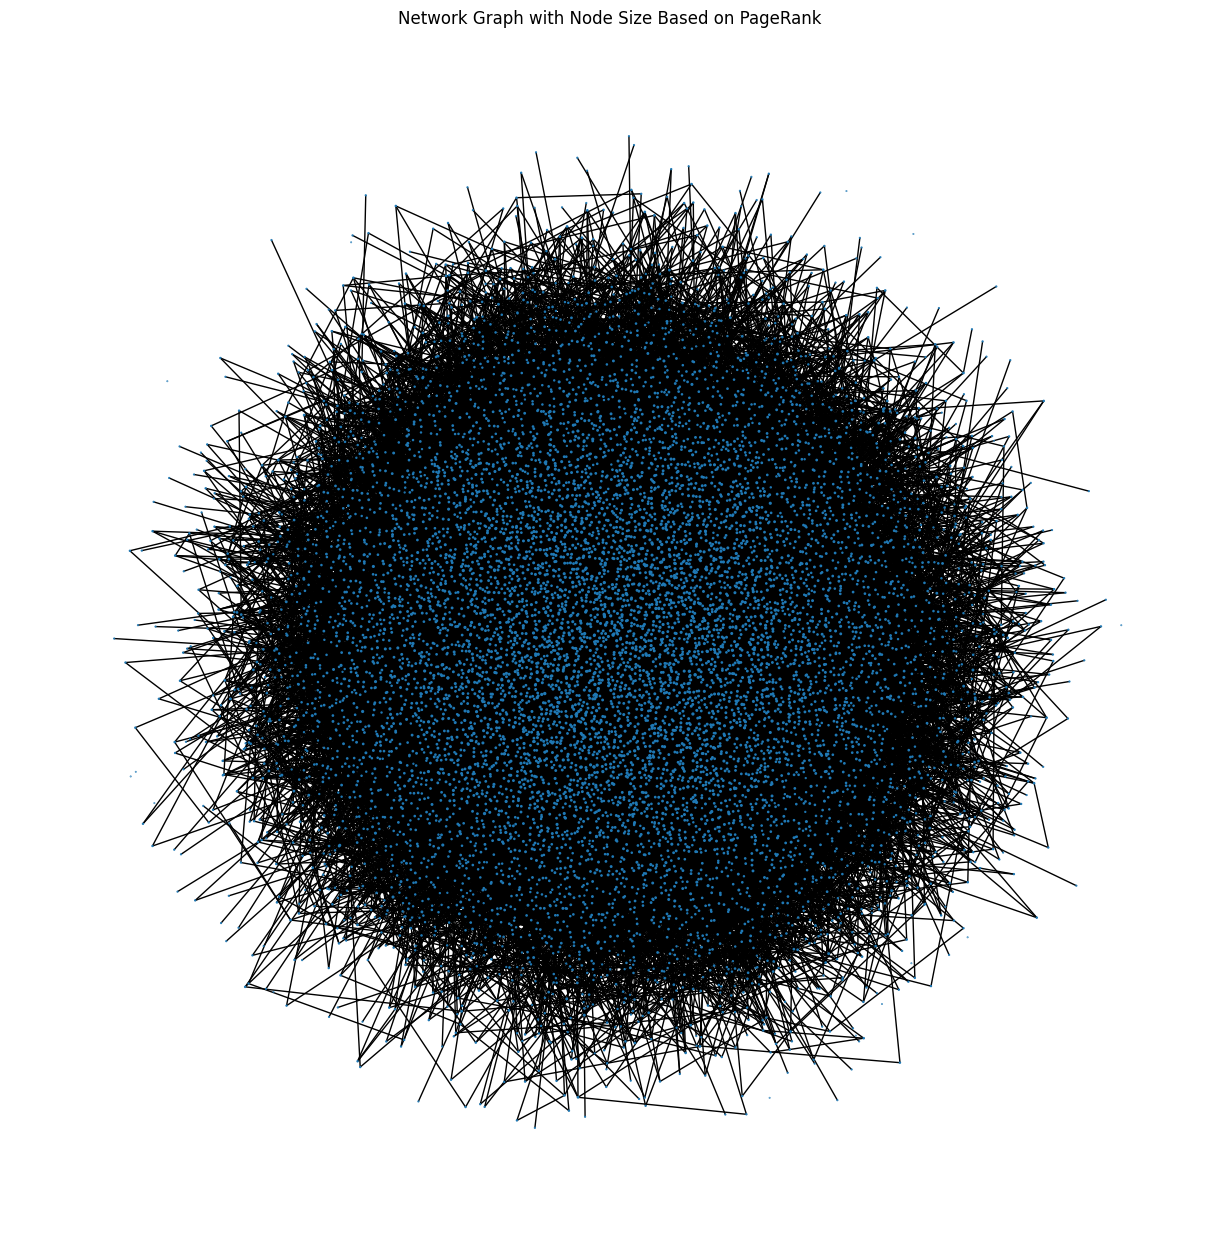

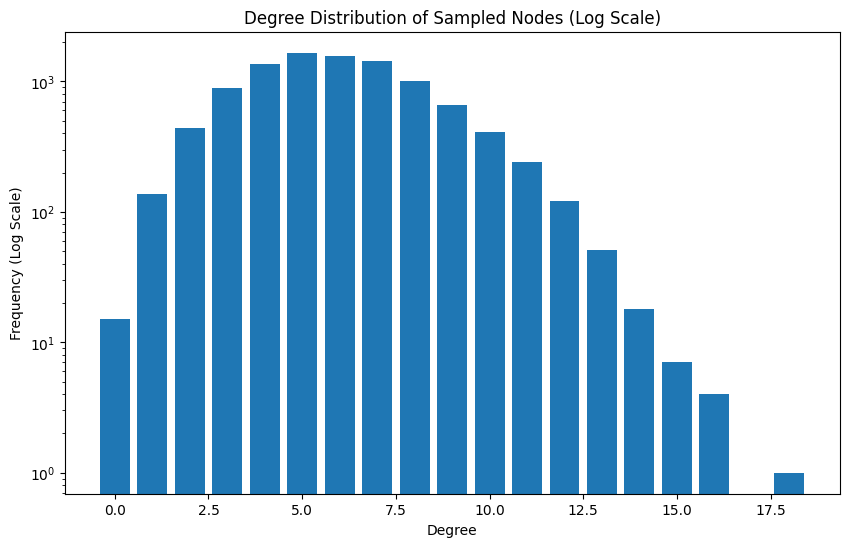

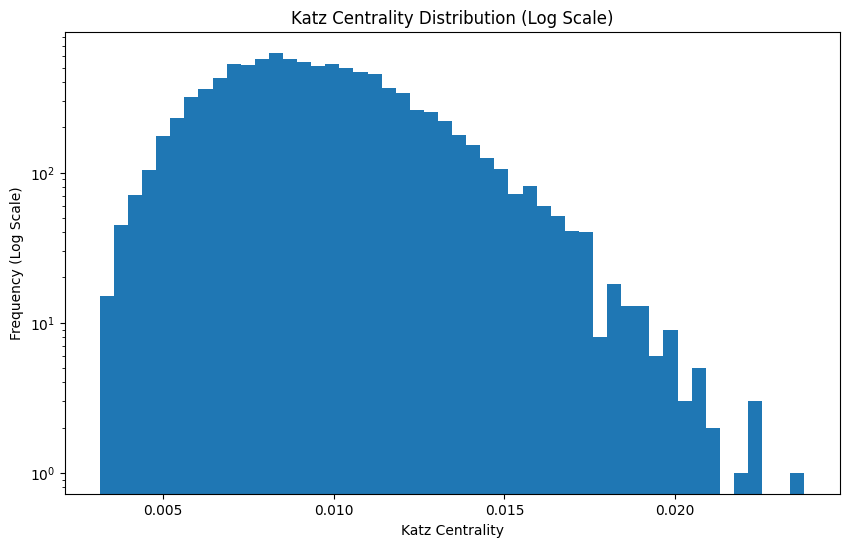

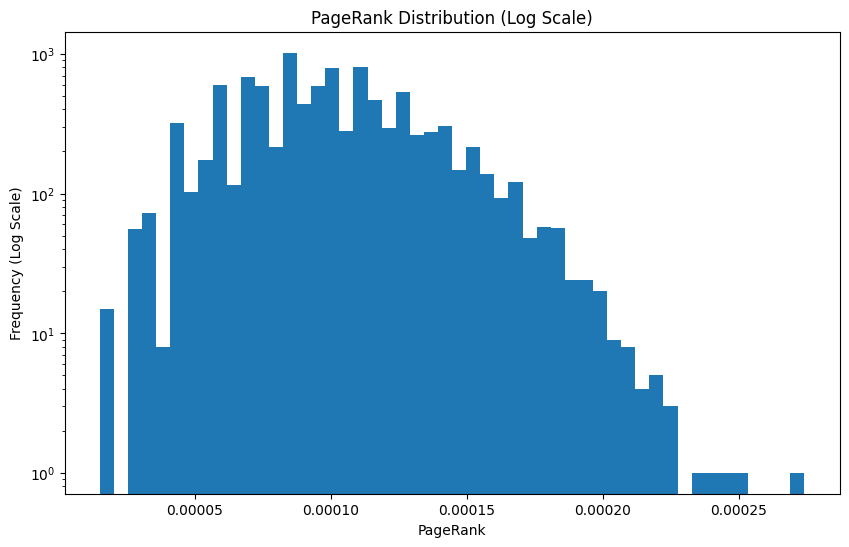

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Generate a random graph with 10,000 nodes
G = nx.gnm_random_graph(10000, 30000)

# Convert NodeView to list and sample 10,000 nodes randomly
sampled_nodes = random.sample(list(G.nodes()), 10000)
sampled_graph = G.subgraph(sampled_nodes)

# Calculate Katz centrality
katz_centrality = nx.katz_centrality(sampled_graph, alpha=0.1, beta=1.0)

# Calculate PageRank
page_rank = nx.pagerank(sampled_graph)

# Draw the network graph with node size based on Katz centrality
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(sampled_graph, k=0.1)  # Adjust k for better spacing
node_size = [v * 10000 for v in katz_centrality.values()]
nx.draw(sampled_graph, pos, node_size=node_size, with_labels=False)
plt.title("Network Graph with Node Size Based on Katz Centrality")
plt.show()

# Draw the network graph with node size based on PageRank
plt.figure(figsize=(12, 12))
node_size = [v * 10000 for v in page_rank.values()]
nx.draw(sampled_graph, pos, node_size=node_size, with_labels=False)
plt.title("Network Graph with Node Size Based on PageRank")
plt.show()

# Generate degree distribution for the bar graph
degrees = [G.degree(n) for n in sampled_nodes]
degree_count = {d: degrees.count(d) for d in set(degrees)}

# Draw the bar graph with logarithmic scale
plt.figure(figsize=(10, 6))
plt.bar(degree_count.keys(), degree_count.values())
plt.yscale('log')
plt.title("Degree Distribution of Sampled Nodes (Log Scale)")
plt.xlabel("Degree")
plt.ylabel("Frequency (Log Scale)")
plt.show()

# Draw the bar graph for Katz centrality
plt.figure(figsize=(10, 6))
plt.hist(katz_centrality.values(), bins=50)
plt.yscale('log')
plt.title("Katz Centrality Distribution (Log Scale)")
plt.xlabel("Katz Centrality")
plt.ylabel("Frequency (Log Scale)")
plt.show()

# Draw the bar graph for PageRank
plt.figure(figsize=(10, 6))
plt.hist(page_rank.values(), bins=50)
plt.yscale('log')
plt.title("PageRank Distribution (Log Scale)")
plt.xlabel("PageRank")
plt.ylabel("Frequency (Log Scale)")
plt.show()

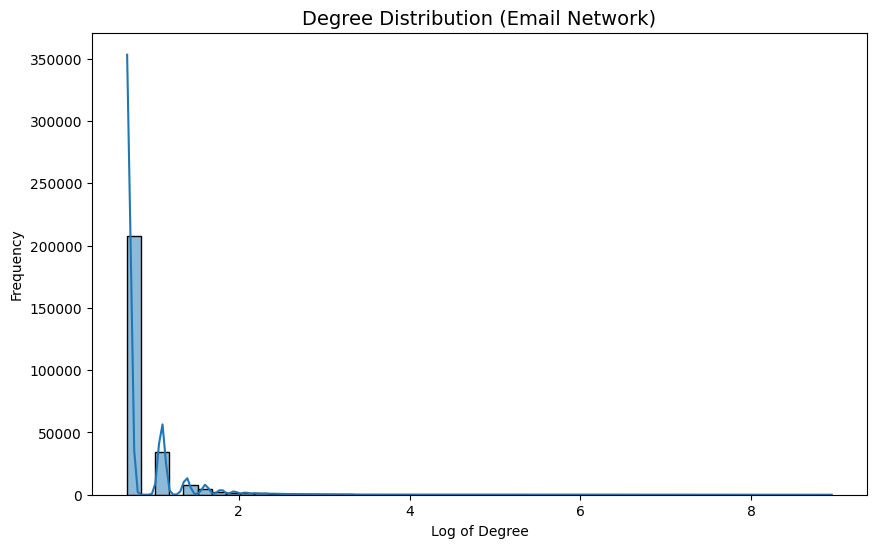

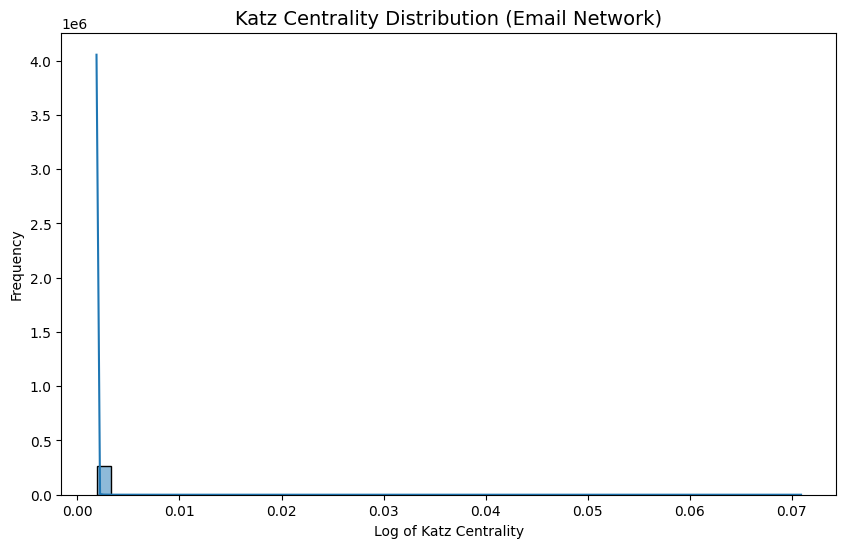

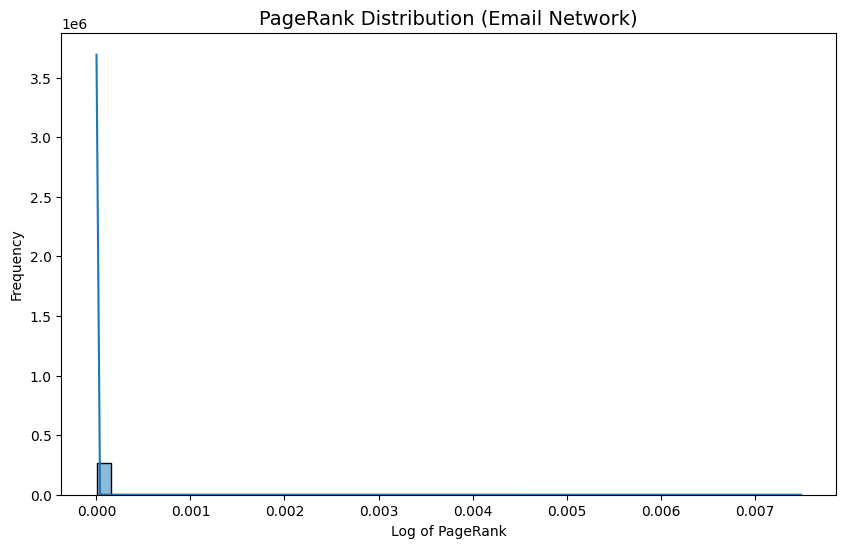

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load datasets
email_edges_path = "Email-EuAll.txt"

# Read the email network file, skipping the header lines
edges_df = pd.read_csv(email_edges_path, sep="\t", comment="#", header=None, names=["source", "target"])

# Create a directed graph
G = nx.DiGraph()
G.add_edges_from(edges_df.values)

# Compute Katz centrality and PageRank (optimized with max_iter)
katz_centrality = nx.katz_centrality(G, alpha=0.005, beta=1.0, max_iter=500)
page_rank = nx.pagerank(G, alpha=0.85, max_iter=500)

# Store results in a DataFrame
centrality_df = pd.DataFrame({
    "id": list(katz_centrality.keys()),
    "katz_centrality": list(katz_centrality.values()),
    "page_rank": list(page_rank.values())
})

# Identify top nodes
top_katz = centrality_df.nlargest(10, "katz_centrality")["id"].tolist()
top_pagerank = centrality_df.nlargest(10, "page_rank")["id"].tolist()

# Function to plot distributions
def plot_distribution(values, title, xlabel):
    log_values = np.log1p(values)  # Apply log transformation
    plt.figure(figsize=(10, 6))
    sns.histplot(log_values, bins=50, kde=True)
    plt.title(title, fontsize=14)
    plt.xlabel(f"Log of {xlabel}")
    plt.ylabel("Frequency")
    plt.show()


# Compute degree distribution
degrees = [G.degree(n) for n in G.nodes()]
plot_distribution(degrees, "Degree Distribution (Email Network)", "Degree")

# Compute Katz centrality distribution
plot_distribution(list(katz_centrality.values()), "Katz Centrality Distribution (Email Network)", "Katz Centrality")

# Compute PageRank distribution
plot_distribution(list(page_rank.values()), "PageRank Distribution (Email Network)", "PageRank")

# Visualization function for full network
def plot_graph(G, highlight_nodes, title):
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G, seed=42, k=0.1, iterations=50)
    
    nx.draw_networkx_edges(G, pos, alpha=0.5, width=0.8, edge_color="gray")
    nx.draw_networkx_nodes(G, pos, node_size=10, alpha=0.7, node_color="blue")
    nx.draw_networkx_nodes(G, pos, nodelist=[n for n in highlight_nodes if n in G], node_size=50, node_color="red")
    
    plt.title(title, fontsize=14)
    plt.show()

# Generate network visualizations
plot_graph(G, top_katz, "Katz Centrality - Email Network")
plot_graph(G, top_pagerank, "PageRank - Email Network")
plot_graph(G, set(top_katz + top_pagerank), "Email Network with Top Nodes")
